In [2]:
#import required libraries
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


In [3]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


In [4]:
#load the json and create the model
json_file = open('./Model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [5]:
#load the weights
emotion_model.load_weights("./Model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        './DataSet/images/validation',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

Found 6911 images belonging to 7 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_13160\3807581334.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[114  12 133 243 175  99  75]
 [ 12   3  22  25  23  11  12]
 [118   9 163 257 206 120 110]
 [217  24 302 514 342 240 178]
 [139   8 188 328 261 166 126]
 [148  16 188 303 248 131 105]
 [ 88   9 110 234 172  98  86]]


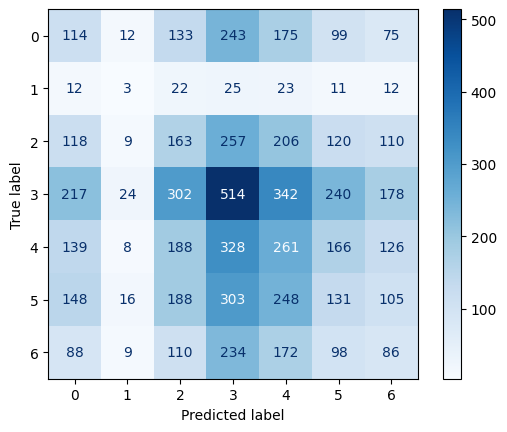

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.13      0.14       851
           1       0.04      0.03      0.03       108
           2       0.15      0.17      0.16       983
           3       0.27      0.28      0.28      1817
           4       0.18      0.21      0.20      1216
           5       0.15      0.12      0.13      1139
           6       0.12      0.11      0.12       797

    accuracy                           0.18      6911
   macro avg       0.15      0.15      0.15      6911
weighted avg       0.18      0.18      0.18      6911



In [8]:
# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))
